# Generating Portrait Plots<a =id"top"></a>

# Table of Content

- [Preparing The notebook](#prep)
- [Loading Data Using the JSons class](#load)
- [Plotting With A Portrait Plot](#basic)
- [Customizing The Portrait Plot](#custom)
- [Plotting Multiple Sources](#multiple)
- [Clickable Portrait Plots](#click)
  - [One source](#click_one)
  - [Multiple sources](#click_multi)
    - [Separate Portrait Plots On A PAge](#click_multi_separated)
    - [Mutliple Sources Within A Single Portrait Plot](#click_multi_sources)
    - [Multiple Portrait Plots with Multiple Sources](#click_multi_all)
    - [Linking from axes labels](#click_ticks)

# Preparing The notebook<a id="prep"></A>

In [1]:
import tempfile
import base64
import os
import sys

class VCSAddonsNotebook(object):
    def __init__(self,x):
        self.x = x
    def _repr_png_(self):
        fnm = tempfile.mktemp()+".png"
        self.x.png(fnm)
        encoded = base64.b64encode(open(fnm, "rb").read())
        return encoded
    def __call__(self):
        return self
    
# VCS Canvas
import vcs
x=vcs.init(bg=True,geometry=(400,400))
show = VCSAddonsNotebook(x)
# Load our "pretty" colormap
x.scriptrun(
    os.path.join(
        sys.prefix,
        "share",
        "pmp",
        "graphics",
        'vcs',
        'portraits.scr'))
x.setcolormap("bl_rd_12")

# Loading Data Using The Json Class<a id="load"></A>

We will be using test data, with path relative to the directory of this Notebook

For more on Json Class see [this Notebook](JsonClass.ipynb)

In [2]:
import glob
import json
import os
import pcmdi_metrics
import genutil

pth = os.path.abspath(os.path.join(
    os.getcwd(),
    "..",
    "..",
    "tests",
    "graphics",
    "json"))

json_files = glob.glob(
    os.path.join(
    pth,
    "v2.0",
    "*.json"))

json_files += glob.glob(
    os.path.join(
    pth,
    "v1.0",
     "*.json"))

print "We are looking at {:d} Json Files:".format(len(json_files))
J = pcmdi_metrics.pcmdi.io.JSONs(json_files)

models = sorted(J.getAxis("model")[:])
variables = sorted(J.getAxis("variable")[:])
print "We read in {:d} models: {}:".format(len(models),models)
print "We read in {:d} variables: {}:".format(len(variables),variables)

# reads in rms_xy for all season, global region
rms_xy = J(statistic=["rms_xy"],region="global")(squeeze=1)
median = genutil.statistics.median(rms_xy,axis=1)[0]

#match  shapes
rms_xy, median = genutil.grower(rms_xy,median)

#Loose info on median
median = median.filled()
# normalize
rms_xy = (rms_xy-median) / median

We are looking at 28 Json Files:
We read in 17 models: [u'0071-0100', u'ACCESS1-0', u'ACCESS1-3', u'CCSM4', u'CESM1-BGC', u'CESM1-CAM5', u'CESM1-FASTCHEM', u'CESM1-WACCM', u'CSIRO-Mk3-6-0', u'FGOALS-g2', u'GFDL-CM3', u'GFDL-ESM2G', u'GFDL-ESM2M', u'HadGEM2-AO', u'MIROC4h', u'bcc-csm1-1', u'bcc-csm1-1-m']:
We read in 14 variables: [u'pr', u'prw', u'psl', u'rltcre', u'rlut', u'rstcre', u'ta-200', u'ta-850', u'tas', u'ua-200', u'ua-850', u'va-200', u'va-850', u'zg-500']:


/Users/doutriaux1/anaconda2/envs/vcdat/lib/python2.7/site-packages/genutil/statistics.py:1712: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  if numpy.rank(ii) > 0:


# Plotting A Portrait Plot<a id="basic"></a>

/Users/doutriaux1/anaconda2/envs/vcdat/lib/python2.7/site-packages/vcs/VTKPlots.py:1020: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  data[:] = numpy.ma.masked_invalid(data, numpy.nan)


NPARAM: 3


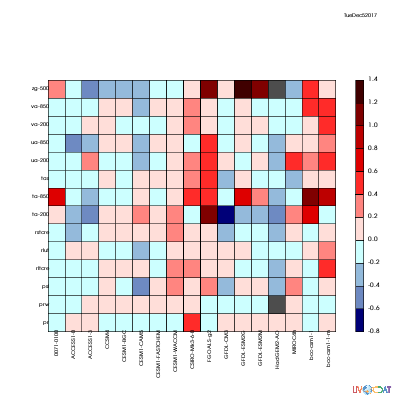

In [3]:
import pcmdi_metrics.graphics.portraits
P = pcmdi_metrics.graphics.portraits.Portrait()
#P.PLOT_SETTINGS.colorm
yax = [s.encode('utf-8') for s in models]  # CHANGE FROM UNICODE TO BYTE STRINGS

# Preprocessing step to "decorate" the axes on our target variable
P.decorate(rms_xy, variables, yax)

# Plot ANNUL
P.plot(rms_xy[...,0],x=x)
show()

# Customizing The Portrait Plot<a id="custom"></a>

Most of the setting to customize the portrait plot are contained in 
P.PLOT_SETTINGS

NPARAM: 3


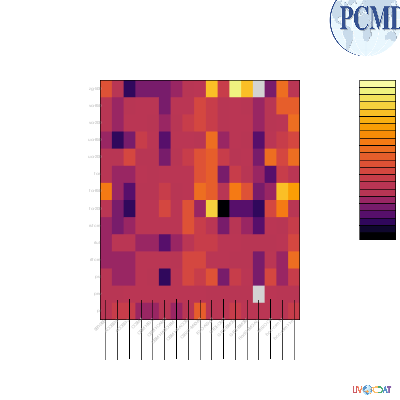

In [4]:
SET = P.PLOT_SETTINGS
# Viewport on the Canvas
SET.x1 = .25
SET.x2 = .75
SET.y1 = .2
SET.y2 = .8

# Legend
SET.legend.x1 = .9
SET.legend.x2 = .99
SET.legend.y1 = .4
SET.legend.y2 = .8

# Both X (horizontal) and y (VERTICAL) ticks
# Text table
SET.tictable = vcs.createtexttable()
SET.tictable.color="grey"

# X (bottom) ticks
# Text Orientation
SET.xticorientation = vcs.createtextorientation()
SET.xticorientation.angle = -45
SET.xticorientation.halign="right"
SET.xticorientation.height = 8
# Y (vertical) ticks
SET.yticorientation = vcs.createtextorientation()
SET.yticorientation.angle = 0
SET.yticorientation.halign="right"
SET.yticorientation.height = 8

# Parameters
SET.parameterorientation = vcs.createtextorientation()
SET.parameterorientation.height = 60
SET.parametertable = vcs.createtexttable()
SET.parametertable.color = "blue"

# We can turn off the "grid"
SET.draw_mesh = "n"

# Control color for missing
SET.missing_color = "light grey"

# Tics length
SET.xtic1.y1 = .25
SET.xtic1.y2 = .1

# Logo can be a string or an image
SET.logo = P.PLOT_SETTINGS.logo = os.path.join(sys.prefix,"share","pmp","graphics","png","160915_PCMDI_logo_348x300px.png")
SET.logo.x = .93
SET.logo.y = .95
SET.logo.width = 85

# Timestamp
SET.time_stamp = vcs.createtext()
SET.time_stamp.color = "blue"
SET.time_stamp.y = [.9]
SET.time_stamp.x = [.98]
SET.time_stamp.halign="right"
# or we can turn it off
SET.time_stamp = None

# Colormap
SET.colormap = "inferno"

# level to use
SET.levels = [-.7,-.6,-.5,-.4,-.3,-.2,-.1,0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1.,1.1,1.2,1.3,1.4,1.5]
# colors to use
SET.fillareacolors = vcs.getcolors(SET.levels)
x.clear()
P.plot(rms_xy[...,0],x=x)
show()

# Plotting Multiple Sources<a id="multiple"></a>

We may want to show 2 seasons at once

NPARAM: 3


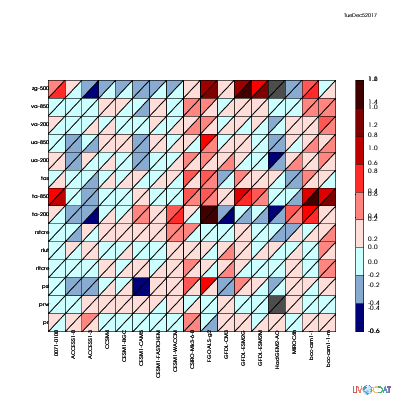

In [5]:
# Start fresh
P = pcmdi_metrics.graphics.portraits.Portrait()
P.decorate(rms_xy, variables, yax)
x.clear()
# DJF and JJA
# DJF if first (1) out of two sources (2)
P.plot(rms_xy[...,1],x=x,multiple=1.2)
# JJA is second (2) out of two sources (2)
P.plot(rms_xy[...,3],x=x,multiple=2.2)
show()

or all four seasons

NPARAM: 3


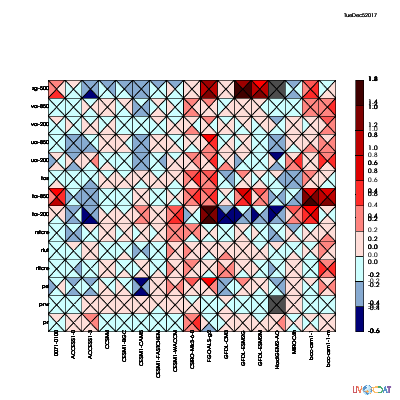

In [6]:

# All for season
for i in range(4):
    multi=i+1.4
    P.plot(rms_xy[...,i+1],x=x,multiple=multi)
show()

# Clickable Portrait Plot<a id="custom"></a>

The following section shows how to generate a *clickable* portrait png

## One Source<a id="click_one"></a>

In [7]:
# First retrieve the mesh object, vcs template and vcs meshfill grpahic method used when plotting
x.clear()
mesh, template, meshfill = P.plot(rms_xy[...,0],x=x)
x.png("clickable.png")

# Creates clickable polygons numpy arrays
click_areas = vcs.utils.meshToPngCoords(mesh,template,[meshfill.datawc_x1,meshfill.datawc_x2,meshfill.datawc_y1,meshfill.datawc_y2],png="clickable.png")

NPARAM: 3


In [8]:
import genutil

# This is a template for where the target files should be
targets_template = genutil.StringConstructor("%(variable)_%(model).html")

# function to create list of target files for each clickable cell
# adapt this to your needs, html files here will not exist
def createTargets(data,targets_template):
    # Axes have been "decorated" via P.decorate()
    outs = []  # list of target html files
    tips = []  # list of tooltips
    extras = []  # list of extra attributes for "area" tags
    indx = 0
    flt = data.ravel()
    # Y axis
    for a in data.getAxis(0).id.split("___"):
        targets_template.variable = a
        # X axis
        for b in data.getAxis(-1).id.split("___"):
            targets_template.model = b
            fnm = targets_template()
            # Here we test if 
            outs.append(fnm)
            tips.append("Model: %s<br>Variable: %sValue: %.3g<div id='thumbnail'><img src='%s' width=200></div>" % (b,a,flt[indx],outs[-1].replace("html","png")))
            extras.append("mycustom_attribute='{}'".format(indx))
            indx += 1
    return outs, tips, extras

targets, tooltips, extras = createTargets(rms_xy[...,0],targets_template)

/Users/doutriaux1/anaconda2/envs/vcdat/lib/python2.7/site-packages/ipykernel/__main__.py:24: UserWarning: Warning: converting a masked element to nan.


In [9]:
geo = x.geometry()
# create the html map element
map_element = vcs.utils.mapPng("clickable.png",click_areas,targets,tooltips,width=geo["width"],height=geo["height"], extras=extras)

In [10]:
# write the html
share_pth = os.path.join(sys.prefix,"share","vcs")
def write_html(html_file, map_element):
    print "TIPS AND MAPPER:",share_pth+"/mapper.js"
    with open(html_file,"w") as f:
        f.write("<html><head>")
        f.write("<script type='text/javascript' src='%s/mapper.js'></script>" % share_pth)
        f.write("<script type='text/javascript' src='%s/cvi_tip_lib.js'></script>" % share_pth)
        f.write('<script src="https://ajax.googleapis.com/ajax/libs/jquery/3.2.1/jquery.min.js"></script>')
        f.write('<link rel="stylesheet" type="text/css" href="%s/tooltip.css" />' % share_pth)
        f.write("</head><body>")
        f.write("<h1>Clickable Portraits Plots</h1>")
        f.write(map_element)
        #f.write("$('area').hover(function(){$(this).css('border','5px');},function(){$(this).css('border','0px');});")
        f.write("</body></head></html>")

write_html("clickable_portrait.html", map_element)

TIPS AND MAPPER: /Users/doutriaux1/anaconda2/envs/vcdat/share/vcs/mapper.js


In [11]:
# Viz
def viz(html_file):
    from IPython.display import HTML
    #class HTML(object):
    #    def __init__(self,html):
    #        self.html = html
    #    def _repr_html_(self):
    #        return self.html

    f=open(html_file)
    html = f.read()
    mapper = open(share_pth+"/mapper.js").read()
    tips = open(share_pth+"/mapper.js").read()
    HTML(mapper)
    HTML(tips)
    return HTML(html)
    
viz("clickable_portrait.html")

## Multiple Portrait Plots<a id="click_multi"></a>

### Separate Portraits On A Page<a id="click_multi_separated"></a>

[Back To Top]

NPARAM: 3
NPARAM: 3


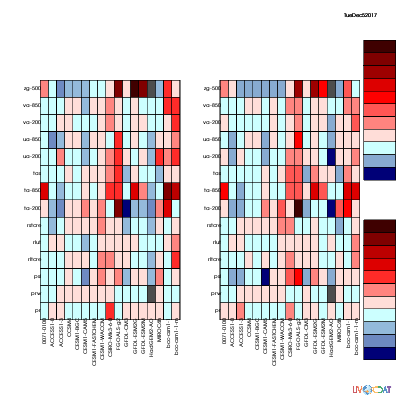

In [12]:
import numpy

P1 = pcmdi_metrics.graphics.portraits.Portrait()
P1.decorate(rms_xy, variables, yax)
P2 = pcmdi_metrics.graphics.portraits.Portrait()
P2.decorate(rms_xy, variables, yax)
x.clear()

SET1 = P1.PLOT_SETTINGS
# Viewport on the Canvas
SET1.x1 = .1
SET1.x2 = .45
SET1.y1 = .2
SET1.y2 = .8

SET1.legend.x1 = .91
SET1.legend.x2 = .99
SET1.legend.y1 = .1
SET1.legend.y2 = .45

SET2 = P2.PLOT_SETTINGS
# Viewport on the Canvas
SET2.x1 = .55
SET2.x2 = .9
SET2.y1 = .2
SET2.y2 = .8

SET2.legend.x1 = .91
SET2.legend.x2 = .99
SET2.legend.y1 = .55
SET2.legend.y2 = .9


mesh1, template1, meshfill1 = P1.plot(rms_xy[...,0],x=x)
mesh2, template2, meshfill2 = P2.plot(rms_xy[...,1],x=x)
x.png("clickable2.png")
show()

In [13]:
# Prepare areas target and tooltips for first plot
click_areas1 = vcs.utils.meshToPngCoords(mesh1,template1,[meshfill1.datawc_x1,meshfill1.datawc_x2,meshfill1.datawc_y1,meshfill1.datawc_y2],png="clickable2.png")
targets1, tooltips1, extras1 = createTargets(rms_xy[...,0],targets_template)

# Prepare areas target and tooltips for second plot
click_areas2 = vcs.utils.meshToPngCoords(mesh2,template2,[meshfill2.datawc_x1,meshfill2.datawc_x2,meshfill2.datawc_y1,meshfill2.datawc_y2],png="clickable2.png")
targets2, tooltips2, extras2 = createTargets(rms_xy[...,1],targets_template)

# Merge together all these
targets = numpy.concatenate((targets1, targets2))
tooltips = numpy.concatenate((tooltips1,tooltips2))
extras = numpy.concatenate((extras1,extras2))
click_areas = numpy.concatenate((click_areas1,click_areas2))

geo = x.geometry()
# create the html map element
map_element = vcs.utils.mapPng("clickable2.png",click_areas,targets,tooltips,extras=extras,width=geo["width"],height=geo["height"])

# Geenrate html file
write_html("clickable_portrait_2.html", map_element)
viz("clickable_portrait_2.html")

/Users/doutriaux1/anaconda2/envs/vcdat/lib/python2.7/site-packages/ipykernel/__main__.py:24: UserWarning: Warning: converting a masked element to nan.


TIPS AND MAPPER: /Users/doutriaux1/anaconda2/envs/vcdat/share/vcs/mapper.js


### Multiple Sources Within A Single Portrait Plot<a id="click_multi_sources"></a>

In [14]:
P = pcmdi_metrics.graphics.portraits.Portrait()
P.decorate(rms_xy, variables, yax)

x.clear()

for i in range(3):
    multi=i+1.3
    mesh, template, meshfill = P.plot(rms_xy[...,i+1],x=x,multiple=multi)
    x.png("clickable3.png")
    click_areas1 = vcs.utils.meshToPngCoords(mesh,template,[meshfill.datawc_x1,meshfill.datawc_x2,meshfill.datawc_y1,meshfill.datawc_y2],png="clickable3.png")
    targets1, tooltips1, extras1 = createTargets(rms_xy[...,i+1],targets_template)
    if i==0:
        click_areas = click_areas1
        targets = targets1
        tooltips = tooltips1
        extras = extras1
    else:
        targets = numpy.concatenate((targets,targets1))
        tooltips = numpy.concatenate((tooltips,tooltips1))
        extras = numpy.concatenate((extras,extras1))
        click_areas = numpy.concatenate((click_areas,click_areas1))

geo = x.geometry()
# create the html map element
map_element = vcs.utils.mapPng("clickable3.png",click_areas,targets,tooltips,extras=extras,width=geo["width"],height=geo["height"])

# Geenrate html file
write_html("clickable_portrait_3.html", map_element)
viz("clickable_portrait_3.html")

NPARAM: 3


/Users/doutriaux1/anaconda2/envs/vcdat/lib/python2.7/site-packages/ipykernel/__main__.py:24: UserWarning: Warning: converting a masked element to nan.


TIPS AND MAPPER: /Users/doutriaux1/anaconda2/envs/vcdat/share/vcs/mapper.js


### Multiple Portrait Plots with Multiple Sources<a id="click_multi_all"></a>

In [15]:
P1 = pcmdi_metrics.graphics.portraits.Portrait()
P1.decorate(rms_xy, variables, yax)
P2 = pcmdi_metrics.graphics.portraits.Portrait()
P2.decorate(rms_xy, variables, yax)
x.clear()

SET1 = P1.PLOT_SETTINGS
# Viewport on the Canvas
SET1.x1 = .1
SET1.x2 = .45
SET1.y1 = .2
SET1.y2 = .8

SET1.legend.x1 = .91
SET1.legend.x2 = .99
SET1.legend.y1 = .1
SET1.legend.y2 = .45

SET2 = P2.PLOT_SETTINGS
# Viewport on the Canvas
SET2.x1 = .55
SET2.x2 = .9
SET2.y1 = .2
SET2.y2 = .8

SET2.legend.x1 = .91
SET2.legend.x2 = .99
SET2.legend.y1 = .55
SET2.legend.y2 = .9

for i in range(2):
    multi=i+1.3
    mesh, template, meshfill = P1.plot(rms_xy[...,i+1],x=x,multiple=multi)
    x.png("clickable4.png")
    click_areas1 = vcs.utils.meshToPngCoords(mesh,template,[meshfill.datawc_x1,meshfill.datawc_x2,meshfill.datawc_y1,meshfill.datawc_y2],png="clickable3.png")
    targets1, tooltips1, extras1 = createTargets(rms_xy[...,i+1],targets_template)
    if i==0:
        click_areas = click_areas1
        targets = targets1
        tooltips = tooltips1
        extras = extras1
    else:
        targets = numpy.concatenate((targets,targets1))
        tooltips = numpy.concatenate((tooltips,tooltips1))
        extras = numpy.concatenate((extras,extras1))
        click_areas = numpy.concatenate((click_areas,click_areas1))
        
    mesh, template, meshfill = P2.plot(rms_xy[...,i+3],x=x,multiple=multi)
    x.png("clickable4.png")
    click_areas1 = vcs.utils.meshToPngCoords(mesh,template,[meshfill.datawc_x1,meshfill.datawc_x2,meshfill.datawc_y1,meshfill.datawc_y2],png="clickable3.png")
    targets1, tooltips1, extras1 = createTargets(rms_xy[...,i+3],targets_template)
    targets = numpy.concatenate((targets,targets1))
    tooltips = numpy.concatenate((tooltips,tooltips1))
    extras = numpy.concatenate((extras,extras1))
    click_areas = numpy.concatenate((click_areas,click_areas1))

geo = x.geometry()
# create the html map element
map_element = vcs.utils.mapPng("clickable4.png",click_areas,targets,tooltips,extras=extras,width=geo["width"],height=geo["height"])

# Geenrate html file
write_html("clickable_portrait_4.html", map_element)
viz("clickable_portrait_4.html")

NPARAM: 3


/Users/doutriaux1/anaconda2/envs/vcdat/lib/python2.7/site-packages/ipykernel/__main__.py:24: UserWarning: Warning: converting a masked element to nan.


NPARAM: 3
TIPS AND MAPPER: /Users/doutriaux1/anaconda2/envs/vcdat/share/vcs/mapper.js


# Clicking on ticks<a id="click_ticks"></a>

In [16]:
P = pcmdi_metrics.graphics.portraits.Portrait()
P.decorate(rms_xy, variables, yax)

x.clear()
mesh, template, meshfill = P.plot(rms_xy[...,0],x=x)
x.png("clickable5.png")
# function to create list of target files for each clickable cell
# adapt this to your needs, html files here will not exist
targets, tips, extras = createTargets(rms_xy[...,0],targets_template)

# Creates clickable polygons numpy arrays
#click_areas = vcs.utils.meshToPngCoords(mesh,template,[meshfill.datawc_x1,meshfill.datawc_x2,meshfill.datawc_y1,meshfill.datawc_y2],png="clickable5.png")

click_labels_x = vcs.utils.axisToPngCoords([],meshfill,template,'x1',[meshfill.datawc_x1,meshfill.datawc_x2,meshfill.datawc_y1,meshfill.datawc_y2],png="clickable5.png")
click_labels_y = vcs.utils.axisToPngCoords([],meshfill,template,'y1',[meshfill.datawc_x1,meshfill.datawc_x2,meshfill.datawc_y1,meshfill.datawc_y2],png="clickable5.png")

targets_lbls_x = extras_lbls_x = tips_lbls_x = [meshfill.xticlabels1[k] for k in sorted(meshfill.xticlabels1.keys())]
targets_lbls_y = extras_lbls_y = tips_lbls_y = [meshfill.xticlabels1[k] for k in sorted(meshfill.xticlabels1.keys())]

clicks = numpy.concatenate((click_areas,click_labels_x,click_labels_y))
targets = numpy.concatenate((targets,targets_lbls_x,targets_lbls_y))
tips = numpy.concatenate((tips,tips_lbls_x,tips_lbls_y))
extras = numpy.concatenate((extras,extras_lbls_x, extras_lbls_y))

#clicks = click_labels
#targets = targets

geo = x.geometry()
# create the html map element
map_element = vcs.utils.mapPng("clickable5.png",clicks,targets,tips,extras=extras,width=geo["width"],height=geo["height"])

# Geenrate html file
write_html("clickable_portrait_5.html", map_element)
viz("clickable_portrait_5.html")

NPARAM: 3


/Users/doutriaux1/anaconda2/envs/vcdat/lib/python2.7/site-packages/ipykernel/__main__.py:24: UserWarning: Warning: converting a masked element to nan.


TIPS AND MAPPER: /Users/doutriaux1/anaconda2/envs/vcdat/share/vcs/mapper.js
